# Example 8.1.1+2 and 8.2.2+3+4 Dissociation Pressure

Author: Marcel Steiner-Curtis \
Date: 07.03.2021 sml: Python-Jupyter Notebook

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import norm
from statsmodels.graphics.gofplots import ProbPlot
import warnings
warnings.filterwarnings('ignore')

## Example 8.1.1 Dissociation Pressure

read data

In [2]:
os.chdir('../04 Datasets')
data = pd.read_csv('dissociation-pressure.dat', sep='\t')
data.head()

,Temperature,Pressure
0,738,0.000021
1,748,0.000048
2,764,0.000060
3,770,0.000092
4,792,0.000206


In [3]:
data.columns.values

array(['Temperature', 'Pressure'], dtype=object)

transform variables

In [4]:
data['Temperatureinv'] = 1/data.Temperature
#   in Python log denotes the natural logarithm
data['Pressureln'] = np.log(data.Pressure)

scatter diagram: Pressure versus Temperature

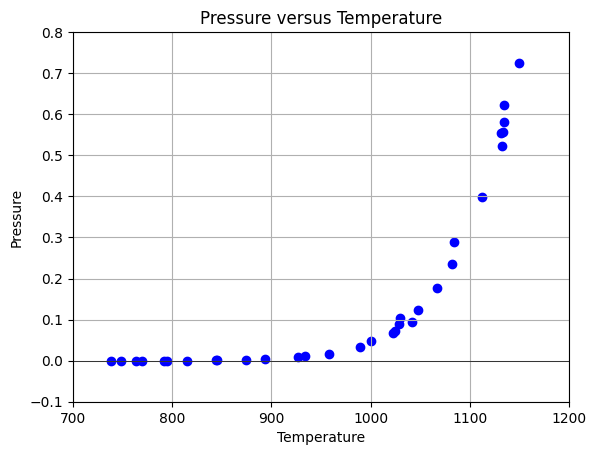

In [5]:
plt.close()
plt.xlim([700,1200])
plt.ylim([-0.1,0.8])
plt.scatter(data.Temperature, data.Pressure, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Pressure versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

scatter diagram: ln(Pressure) versus 1/Temperature

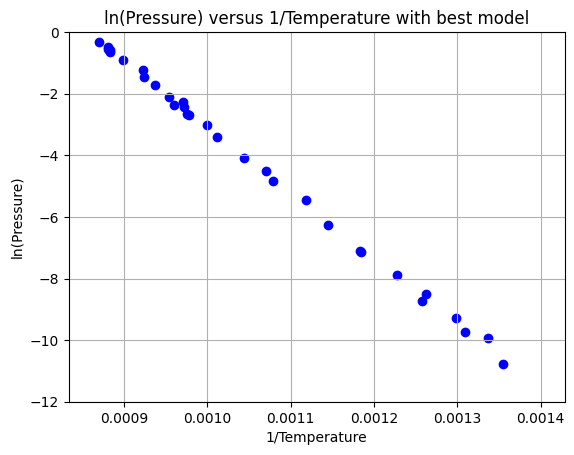

In [6]:
plt.close()
plt.xlim([1/1200,1/700])
plt.ylim([-12,0])
plt.scatter(data.Temperatureinv, data.Pressureln, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('ln(Pressure) versus 1/Temperature with best model')
plt.xlabel('1/Temperature')
plt.ylabel('ln(Pressure)')
plt.show()

linear model

In [7]:
mod = smf.ols(formula='Pressureln ~ Temperatureinv', data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Pressureln   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.538e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.75e-45
Time:                        20:30:02   Log-Likelihood:                 24.456
No. Observations:                  32   AIC:                            -44.91
Df Residuals:                      30   BIC:                            -41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.1847      0.142    128.

scatter diagram: ln(Pressure) versus 1/Temperature with best model

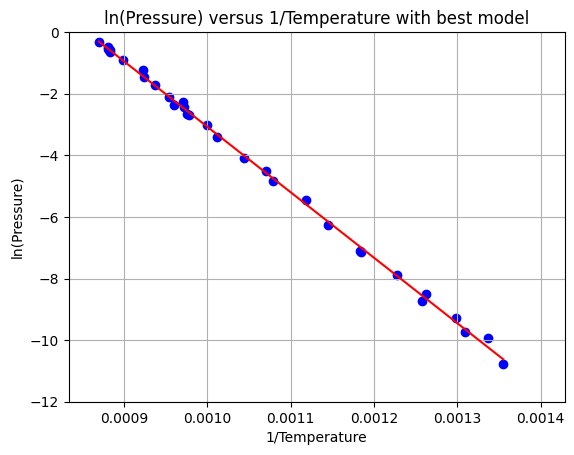

In [8]:
plt.close()
plt.xlim([1/1200,1/700])
plt.ylim([-12,0])
plt.scatter(data.Temperatureinv, data.Pressureln, color='blue')
plt.grid()            
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('ln(Pressure) versus 1/Temperature with best model')
plt.xlabel('1/Temperature')
plt.ylabel('ln(Pressure)')
#   add best model
plt.plot(data.Temperatureinv, mod.predict(), color='red')
plt.show()

scatter diagram: ln(Pressure) versus fitted values

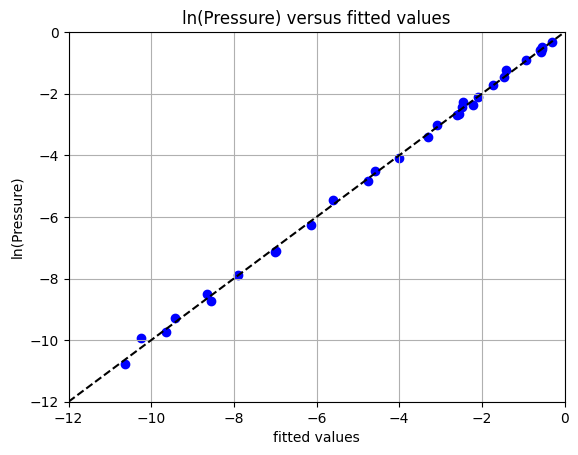

In [9]:
plt.close()
plt.xlim([-12,0])
plt.ylim([-12,0])
plt.scatter(mod.fittedvalues, data.Pressureln, color='blue')
plt.axline((1, 1), slope=1, color='black', ls="--")
plt.grid()            
plt.title('ln(Pressure) versus fitted values')
plt.xlabel('fitted values')
plt.ylabel('ln(Pressure)')
plt.show()

## Example 8.1.2 Coefficient of Determination

In [10]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Pressureln   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.538e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.75e-45
Time:                        20:31:07   Log-Likelihood:                 24.456
No. Observations:                  32   AIC:                            -44.91
Df Residuals:                      30   BIC:                            -41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.1847      0.142    128.

In [11]:
mod.rsquared

0.9988192520334179

In [12]:
np.corrcoef(data.Pressureln, data.Temperatureinv)**2

array([[1.        , 0.99881925],
       [0.99881925, 1.        ]])

In [13]:
np.corrcoef(data.Pressureln, mod.fittedvalues)**2

array([[1.        , 0.99881925],
       [0.99881925, 1.        ]])

## Example 8.2.2 Tukey-Anscombe plot

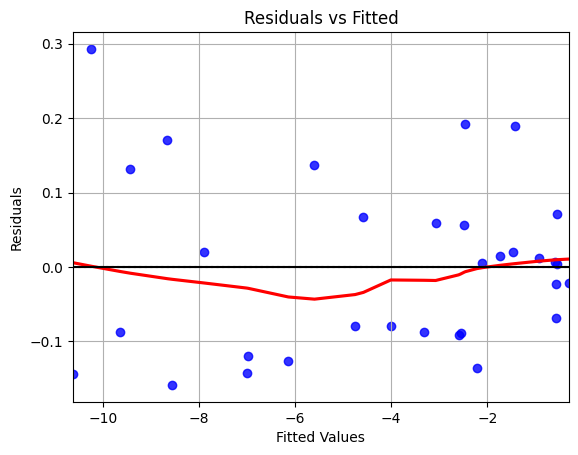

In [14]:
#   Tukey-Anscombe plot
plt.close()
plt.grid()
sns.residplot(x=mod.fittedvalues, y=mod.resid, data=data, lowess=True, 
              color='blue', line_kws={'color': 'red'})
plt.axhline(y=0, color='black')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#   Tukey-Anscombe plot with simulated data
#   sml: missing in Python

## Example 8.2.3 Scale-Location Plot

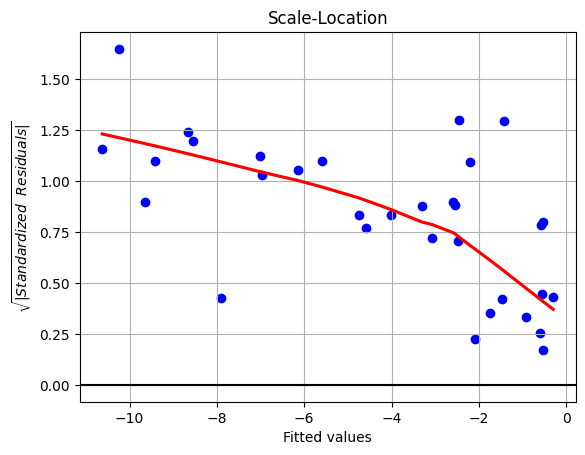

In [15]:
#   scale-location plot
plt.close()
plt.grid() 
plt.scatter(mod.fittedvalues, 
            np.sqrt(np.abs(mod.get_influence().resid_studentized_internal)), 
            color='blue')
sns.regplot(x=mod.fittedvalues, 
            y=np.sqrt(np.abs(mod.get_influence().resid_studentized_internal)),
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red'})
plt.axhline(y=0, color='black')
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('$\sqrt{|Standardized~~Residuals|}$')
plt.show()

#   scale-location plot with simulated data
#   sml: missing in Python

## Example 8.2.4 Histogram and q-q Plot

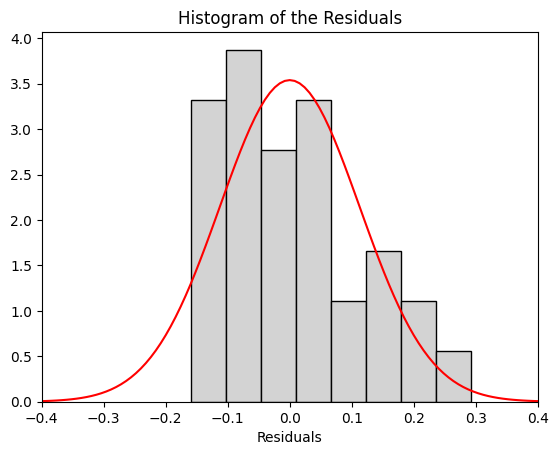

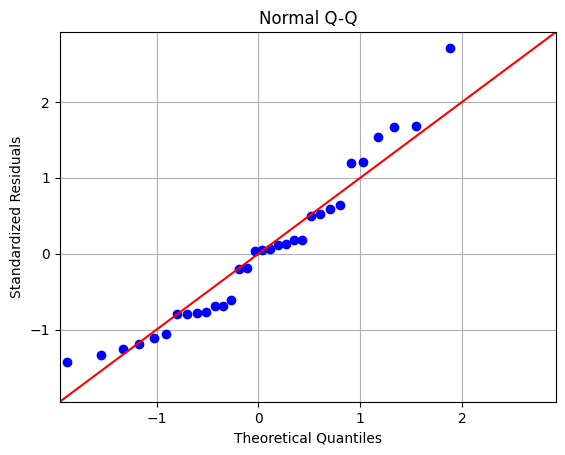

In [16]:
#   histogram
plt.close()
plt.xlim([-0.4,0.4])
plt.hist(mod.resid, bins=8, 
         density=True, facecolor='lightgray', edgecolor='black')
plt.title('Histogram of the Residuals')
plt.xlabel('Residuals')
x = np.linspace(-0.4, 0.4, 101)
plt.plot(x, norm.pdf(x, loc=np.mean(mod.resid), 
                     scale=np.std(mod.resid)), color='red')
plt.show()

#   q-q plot
plt.close()
QQ = ProbPlot(mod.get_influence().resid_studentized_internal)
QQ.qqplot(line='45', markerfacecolor='b', markeredgecolor='b')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.grid() 
plt.show()

#   q-q plot with simulated data
#   sml: missing in Python